Exercise 1

In this exercise you should implement everything including the
tests (e.g. the chi-square and KS tests) yourself. Later, when your
code is working you are free to use builtin functions.

1. Write a program implementing a linear congruential generator
(LCG). Be sure that the program works correctly using only
integer representation.

(a) Generate 10.000 (pseudo-) random numbers and present
these numbers in a histogramme (e.g. 10 classes).

(b) Evaluate the quality of the generator by graphical
descriptive statistics (histogrammes, scatter plots) and
statistical tests - χ
2
,Kolmogorov-Smirnov, run-tests, and
correlation test.

(c) Repeat (a) and (b) by experimenting with different values
of “a”, “b” and “M”. In the end you should have a decent
generator. Report at least one bad and your final choice.

2. Apply a system available generator and perform the various
statistical tests you did under Part 1 point (b) for this
generator too.

3. You were asked to simulate one sample and perform tests on
this sample. Discuss the sufficiency of this approach and take
action, if needed.

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import chi2
import scipy.stats as stats
from scipy.stats import norm

In [89]:
#![image-2.png](attachment:image-2.png)

# Question1

# Part a

In this part we have been asked to implement a  linear congruential generator (LCG). The way LCGs work is that we begin from a number $ X_0 \in [0,N]$. And we generate a sequence of numbers which will represent our sample using the expression $x_{i+1} =(a*x_i+c) \;mod\; m $

In [191]:
def random_num (n,x_0,a,c,m): 
    random_number = []
    for i in range(n):
        x_i = (x_0 * a + c)%m
        x_0 = x_i
        random_number.append(x_i/m)
    return random_number

## Part b 

After implementing the LCG we are plotting the results to a histogram and also the dependencies between $U_i$ and $U_{i+1}$ using a scatterplot

In [91]:
U = random_num (10000,9,1111,113,2**24)

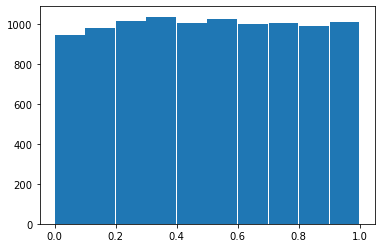

In [92]:
plt.hist(U, bins=10, rwidth=0.975)
plt.show()

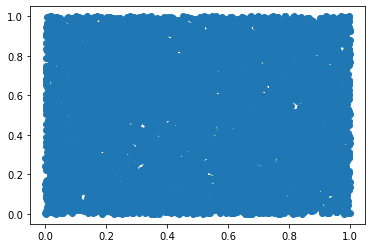

In [93]:
plt.scatter(U[:-1], U[1:])
plt.show()

The histogram even though it is not absolutely uniform it is close enough to the uniform distribution. Also there is not a visible dependency between $U_i$ and $U_{i+1}$. However, more trustworthy are the tests that we we will implement and apply later.

# chi-square test


At the $ \chi ^ 2$ test we are comparing the result of the generated polulations in each class with the expected ones. Specifically we compute the following result:
$$
T = \Sigma_{i=1}^{n_{classes}}\frac{(n_{observed,i}-n_{Expected,i})^2}{n_{Expected,i}} \sim \chi ^ 2(n_{classes} -1)
$$
In our case the number of classes is equal to 10. We will use also the built-in uniform distribution to check our tests. Where the expected values are $10000 * 1/10 $ for each class.

In [130]:
#X2 test

def chisquare(obs, no_class):
    Observed, bins = np.histogram(obs, bins= no_class)
    expct =  len(obs)/no_class
    T = 0
    for i in Observed:
        xx = ((i-expct)**2)/expct
        T+= xx
    p = chi2.pdf(T,9)
    print('chisquare p-value is:',p)
    if(p <= 0.05):
        print('The generated random numbers are not uniformly distributed')
    else:
        print('The null hypothesis was not rejected.')
    return p


In [131]:
chisquare(U, 10)

chisquare p-value is: 0.09991585517170648
The null hypothesis was not rejected.
chisquare p-value is: 0.07294156779389496
The null hypothesis was not rejected.


0.07294156779389496

We got a p-value > 0.5 therefore. We have one more reason to expect that our LCG is a good candidate.

# Kolmogorov-Smirnov

In the Kolmogorov Smirnov test we sort the values created and we get the maximum between the sorted value and the sumulative sum divided by the total number of observations. The sum of that score follows the Kolmogorov smirnov distribution.

we got a score of $25.037327681314157$ while in prder to have level of significance greater than $95%$ we need a score less than $1.358$ therefore we are certain that we do not have a good enough distribution compared to a uniform. 

In [286]:
def KStest(random_num):
    data_sorted = np.sort(random_num)
    fo = data_sorted
    N = len(random_num)
    f = np.cumsum(random_num)
    fr = f/f[-1]
    D = np.max(np.abs(fo - fr))
    ks_calculated_score = (math.sqrt(N) + 0.12 + 0.11/ math.sqrt(N)) * D
    print('Kolmogrov-Smirnov score T:', ks_calculated_score)
    ks_sig = 1.358 # 
    if(ks_calculated_score < ks_sig):
        print('The null hypothesis was not rejected.')
    else:
        print('The generated random numbers are not uniformly distributed.')
    return ks_calculated_score, fo,fr

In [217]:
KStest(U)

Kolmogrov-Smirnov score T: 25.037327681314157
The generated random numbers are not uniformly distributed.


25.037327681314157

we got a score of  25.037327681314157 while in prder to have level of significance greater than 95 we need a score less than  1.358 therefore we are certain that we do not have a good enough distribution compared to a uniform. The same result we get while we run it at the normal distribution.

# Independence Test 

Another group of tests that we can get in order to check the quality of our generator are the independence run tests. In all run tests we check how long some conditions are met. We call these cosnequtive condition saccesses runs.  

## Run-tests I

In the first run test how many values are above and how many are bellow the median value. 

In [138]:
#Independence Test

def Run_Test_I(random_num):
    N = len(random_num)
    med_rand_numbers = np.median(random_num)
    run_vec = ['D' if x < med_rand_numbers else 'U' for x in random_num]
    
    run_number = 0
    k = 1
    while(k <= len(run_vec)):
        j = k
        while(j < len(run_vec)):
            if(run_vec[j-1] == run_vec[j]):
                j = j + 1
                if(j == len(run_vec)):
                    run_number = run_number + 1
            else:
                run_number = run_number + 1
                break
        #end of inner while
        k = j + 1
        if(k == len(run_vec)):
            run_number = run_number + 1
    ## end of while\
    n1 = run_vec.count('U')
    n2 = run_vec.count('D')
    R_hat = (2 *n1 * n2)/ (n1 + n2) + 1
    S_R_squ = (2 * n1 * n2) * (2 * n1 * n2 - n1 - n2)/((n1 + n2)**2 * (n1 + n2 - 1))
    Z_ts = (run_number - R_hat)/math.sqrt(S_R_squ)
    print('Run_Test_I p-value is: ', abs(Z_ts))
    ### for alpha = 0.05 Z_st = 1.96
    if(abs(Z_ts) < 1.96):
        print('Failed to reject Ho')
        print('The generated random numbers are possibly independent')
    else:
        print('Reject H0, and H1 is true')
        print('The generated random numbers are not independent')
    return Z_ts
        

In [139]:
Run_Test_I(U)

Run_Test_I p-value is:  0.9600480084015002
Failed to reject Ho
The generated random numbers are possibly independent
Run_Test_I p-value is:  1.0400520091016252
Failed to reject Ho
The generated random numbers are possibly independent


1.0400520091016252

## Run Test II

In run test II or UP/DOWN TEST of Knuth, a run is the consecutive times that a number is smallwer than the next one.  Then we count the the lengths of the runs. We create a vector of the frequences of the lengths between 1 and 5 and the frequency of runs greater or equal that of equal to 6. We store them in vector $\mathbf{R}$. Then we compute:
$$
V =  \frac{1}{N - 6}  (\mathbf{R} - N  \mathbf{B})^{T}  A  (\mathbf{R} - N  \mathbf{B}) \sim \chi^2(6)
$$

where $A$ and $\mathbf{B}$ are specific to the test. 

In [140]:
def compute_run_lengths(s):
    length = 1
    lengths = np.empty( 0 , dtype = 'int' )
    for i in range(len(s)-1):
        if (s[i]>s[i+1]):
            lengths= np.append(lengths,length)
            length=1
        else:
            length+=1
    lengths= np.append(lengths,length)
    lengths[lengths > 6] = 6
    unique, counts = np.unique(lengths, return_counts=True)
    return unique, counts


In [290]:
def Run_Test_II(sample):
    N = len(sample)
    unique , counts = compute_run_lengths(sample)
    R = np.zeros(6)
    for i in range(len(unique)):
        R[unique[i]-1]=counts[i]

    A = np.array([[4529.4, 9044.9, 13568, 18091, 22615, 27892],
              [9044.9, 18097, 27139, 36187, 45234, 55789],
              [13568, 27139, 40721, 54281, 67852, 83685],
              [18091, 36187, 54281, 72414, 90470, 111580],
              [22615, 45234, 67852, 90470, 113262, 139476],
              [27892, 55789, 83685, 111580, 139476, 172860]])

    B = np.array([1/6, 5/24, 11/120, 19/720, 29/5040, 1/840]).T


    V = (1 / (N - 6)) * (R - N * B) @ A @ (R - N * B).T  
    p_RT2 =1- chi2.cdf(V, 6)  # Using the upper tail of the chi-square distribution
    
    print('Run_Test_II p-value is: ', abs(p_RT2))
    ### for alpha = 0.05 Z_st = 1.96
    if(abs(p_RT2) < 1.96):
        print('Failed to reject Ho')
        print('The generated random numbers are independent')
    else:
        print('Reject H0, and H1 is true')
        print('The generated random numbers are not independent')
    return p_RT2
        

In [180]:
Run_Test_II(U)

[1 2 3 4 5 6] [1616 2124  903  275   52   11]
Run_Test_II p-value is:  0.6125883232970937
Failed to reject Ho
The generated random numbers are independent
[1 2 3 4 5 6] [1619 2044  954  267   54   15]
Run_Test_II p-value is:  0.5314355419158998
Failed to reject Ho
The generated random numbers are independent


0.5314355419158998

# Correlation test

In [273]:
def correlation_test(U, h):
    U = np.array(U)
    n = len(U)
    score = np.mean(U[h:]*U[:-h])
    #score = sum([U[i]*U[i+h] for i in range(n-h)])/(n-h)
    print (score)
    print (norm.cdf(score, loc=0.25, scale=(7/(144*n)**(1/2))))
    print('Correlation test p-value',2 * (1 - norm.cdf(abs(score), loc=0.25, scale=(7/(144*n)**(1/2)))))
    return 2 * (1- norm.cdf(score, loc=0.25, scale=(7/(144*n)**(1/2))))

## Creating a distrution and runnung all tests

In [291]:
U = random_num (10000,9,1111,113,2**24)
chisquare(U, 10)
KStest(U)
Run_Test_I(U)
Run_Test_II(U)
correlation_test(U,2)

chisquare p-value is: 0.09991585517170648
The null hypothesis was not rejected.
Kolmogrov-Smirnov score T: 1.03111803301381
The null hypothesis was not rejected.
Run_Test_I p-value is:  0.9600480084015002
Failed to reject Ho
The generated random numbers are possibly independent
Run_Test_II p-value is:  0.6125883232970937
Failed to reject Ho
The generated random numbers are independent
0.2537234369020558
0.7383619228388225
Correlation test p-value 0.523276154322355


0.523276154322355

th

# Our comments:

in order to accept the correlation test we need a p-value less than 0.5 but we got a p-value of 0.09 so our distribution is not good enough

A correlation test value of 0.2539096878552963 and 0.24547906601348443 indicates a weak positive correlation . Furthermore, it appears that as the value of "h" increases, the correlation becomes weaker.

This pattern suggests that there may be a positive relationship, but it is not very strong. As "h" increases, the strength of the correlation diminishes, indicating that the it may be less closely related at higher values of "h"

# 1c) example of a bad distribution

In [293]:
U = random_num (10000,3,6,3,100)

### Plotting Histogram

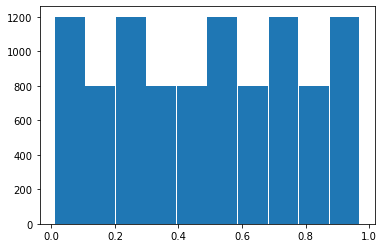

In [251]:
plt.hist(U, bins=10, rwidth=0.975)
plt.show()

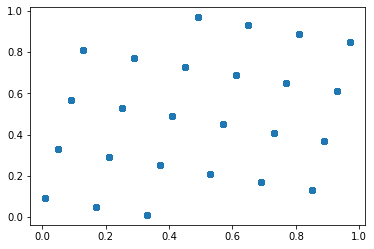

In [249]:
plt.scatter(U[:-1], U[1:])
plt.show()

In [294]:
chisquare(U, 10)
KStest(U)
Run_Test_I(U)
Run_Test_II(U)
correlation_test(U,2)

chisquare p-value is: 6.730298955775708e-81
The generated random numbers are not uniformly distributed
Kolmogrov-Smirnov score T: 3.0036330000000024
The generated random numbers are not uniformly distributed.
Run_Test_I p-value is:  3.8663798603020916
Reject H0, and H1 is true
The generated random numbers are not independent
Run_Test_II p-value is:  0.0
Failed to reject Ho
The generated random numbers are independent
0.24012740548109626
0.04528060069157785
Correlation test p-value 1.9094387986168444


1.9094387986168444

It is visible from the histogram that the distribution is not uniform. Also, at the scatterplot it is clear that we do not have independent samples. The $\chi^2$ test has a p value lower than 0.05 so it is not a normal distribution.The komlogorov test gets similar result with the other values. That means that possibly it is poorly implemented. Scores at both Run Tests are extremely big compared to the built in numpy version and the better version which should be expected.

## Part 2 

In this section we will run our implemented tests in a sample created from the built in uniform distribution of numpy.

In [287]:
U = np.random.uniform(0,1,10000)


In [292]:
chisquare(U, 10)
x ,fo,fr = KStest(U)
Run_Test_I(U)
Run_Test_II(U)
correlation_test(U,2)

chisquare p-value is: 0.09991585517170648
The null hypothesis was not rejected.
Kolmogrov-Smirnov score T: 1.03111803301381
The null hypothesis was not rejected.
Run_Test_I p-value is:  0.9600480084015002
Failed to reject Ho
The generated random numbers are possibly independent
Run_Test_II p-value is:  0.6125883232970937
Failed to reject Ho
The generated random numbers are independent
0.2537234369020558
0.7383619228388225
Correlation test p-value 0.523276154322355


0.523276154322355

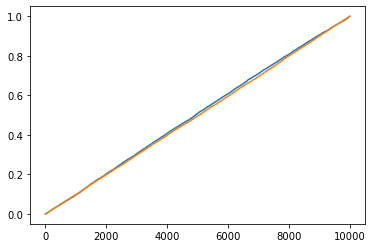

In [289]:
plt.plot(fo)
plt.plot(fr)
plt.show()

While we are using the numpy uniform distribution we get similarn results to the test to the $U = random\_num (10000,9,1111,113,2**24)$ case. However, the correlation test does not seem to work properly.